In [67]:
import numpy as np
 
epochs = 60000           # Number of iterations
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1
 
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([ [0],   [1],   [1],   [0]])
 
def sigmoid (x): return 1/(1 + np.exp(-x))      # activation function
def sigmoid_(x): return x * (1 - x)             # derivative of sigmoid
                                                # weights on layer inputs
    
print(X.shape)    
print(X.shape)

Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
Wz = np.random.uniform(size=(hiddenLayerSize, hiddenLayerSize))
Wp = np.random.uniform(size=(hiddenLayerSize, outputLayerSize))

weights = [Wh, Wz, Wp]

def forward(initial, weights):
    act = sigmoid(np.dot(initial, weights[0]))
    print("act 0", act.shape)
    activations =[initial, act]
    for i in range(1, len(weights)):
        print("weights", i, weights[i].shape)
        act = sigmoid(np.dot(act, weights[i]))
        print("act before", act.shape)
        print("act after", act.shape)
        activations.append(act)
    return activations

result = forward(X, weights)

result.append((Y-result[-1]))


def backward(result, weights):
    d = result[-1] * sigmoid_(result[-2])
    deltas = [d]
    nw = weights[-1]+result[-3].T.dot(d)
    print(nw.shape)
    new_weights = [nw]
    
    for i in reversed(range(1,len(weights))):
            print(i)
            d = deltas[-1].dot(weights[i].T) * sigmoid_(result[i])
            deltas.append(d)
            nw = weights[i-1] + result[i-1].T.dot(d)
            new_weights.append(nw)
    new_weights.reverse()
    return deltas, new_weights
            
dets, nw = backward(result, weights)     


"""
#weights = Wh, Wz, Wp
#deltas = dP, dZ, dH
#result = X, H, Z, P, E

#new_weights = Wh, Wz, Wp
 
H = sigmoid(np.dot(X, Wh))                  # hidden layer results
Z = sigmoid(np.dot(H, Wz))
P = sigmoid(np.dot(Z, Wp))
# output layer results
E = Y - P  

# how much we missed (error)
dP = E * sigmoid_(P)
dZ = dP.dot(Wp.T) * sigmoid_(Z) # delta Z
dH = dZ.dot(Wz.T) * sigmoid_(H) 

Wp +=  Z.T.dot(dP)  # delta H
Wz +=  H.T.dot(dZ)                          # update output layer weights
Wh +=  X.T.dot(dH)                          # update hidden layer weights
 
"""

(4, 2)
(4, 2)
act 0 (4, 3)
weights 1 (3, 3)
act before (4, 3)
act after (4, 3)
weights 2 (3, 1)
act before (4, 1)
act after (4, 1)
(3, 1)
(4, 3)
(4, 1)
(3, 1)
2
1


'\n#weights = Wh, Wz, Wp\n#deltas = dP, dZ, dH\n#result = X, H, Z, P, E\n\n#new_weights = Wh, Wz, Wp\n \nH = sigmoid(np.dot(X, Wh))                  # hidden layer results\nZ = sigmoid(np.dot(H, Wz))\nP = sigmoid(np.dot(Z, Wp))\n# output layer results\nE = Y - P  \n\n# how much we missed (error)\ndP = E * sigmoid_(P)\ndZ = dP.dot(Wp.T) * sigmoid_(Z) # delta Z\ndH = dZ.dot(Wz.T) * sigmoid_(H) \n\nWp +=  Z.T.dot(dP)  # delta H\nWz +=  H.T.dot(dZ)                          # update output layer weights\nWh +=  X.T.dot(dH)                          # update hidden layer weights\n \n'

In [64]:
i = 2
(weights[i].T) * sigmoid_(result[i])

array([[0.        , 0.09132161, 0.00778789, 0.00563812],
       [0.        , 0.08490082, 0.00692834, 0.00551804],
       [0.        , 0.08629469, 0.00706569, 0.00551718],
       [0.        , 0.08074741, 0.00636148, 0.00541697]])

In [43]:
result[-1][:,1]

array([0.79062797, 0.79469726, 0.79373125, 0.79694361])

In [39]:
weights

[array([[0.98770792, 0.26443772, 0.88549473],
        [0.23327575, 0.84301208, 0.39313584],
        [0.88605317, 0.53051441, 0.49022871]]),
 array([[0.92159934, 0.42435554, 0.98472877],
        [0.78434062, 0.31434097, 0.62841085],
        [0.49236854, 0.78901066, 0.22890319],
        [0.29316208, 0.46677062, 0.38738746]]),
 array([[0.19217766],
        [0.13891117],
        [0.323898  ],
        [0.09615682]])]

In [5]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [4]:
X_

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [99]:
print(Wz, H)
print(Wh, X)

[[0.55512912 0.34000737 0.08141557]
 [0.51831999 0.91046699 0.89128068]
 [0.86682557 0.25829731 0.49591378]] [[0.5        0.5        0.5       ]
 [0.63827343 0.63284344 0.61750454]
 [0.50333947 0.66670955 0.61931813]
 [0.64135182 0.77517646 0.72424655]]
[[0.01335807 0.69334018 0.48665504]
 [0.56787818 0.5444347  0.47896964]] [[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [91]:
print(Wh.shape, Wz.shape, Wp.shape)
print(X.shape, H.shape, Z.shape, P.shape, E.shape)

(2, 3) (3, 3) (3, 1)
(4, 2) (4, 3) (4, 3) (4, 1) (4, 1)


In [102]:
print(nw)

[array([[0.33197522, 0.81107705, 0.02706288],
       [0.84715683, 0.38873382, 0.57204578]]), array([[0.66738896, 0.77455983, 0.35275723],
       [0.9182595 , 0.6886416 , 0.30783076],
       [0.40628205, 0.70283517, 0.4704099 ]]), array([[0.00646279],
       [0.67690772],
       [0.38593136]])]


In [103]:
print(Wh, Wz, Wp)

[[0.33197522 0.81107705 0.02706288]
 [0.84715683 0.38873382 0.57204578]] [[0.66738896 0.77455983 0.35275723]
 [0.9182595  0.6886416  0.30783076]
 [0.40628205 0.70283517 0.4704099 ]] [[0.00646279]
 [0.67690772]
 [0.38593136]]


In [82]:
print(dets)

[array([[-0.14441012],
       [ 0.05190981],
       [ 0.05252725],
       [-0.14253002]]), array([[-0.01043926, -0.00726792, -0.02337208],
       [ 0.00361891,  0.00247   ,  0.00772338],
       [ 0.00372674,  0.00255442,  0.00792593],
       [-0.00973677, -0.00654838, -0.01978065]]), array([[-0.00775677, -0.00587856, -0.00442538],
       [ 0.00258016,  0.00193919,  0.00128183],
       [ 0.00262794,  0.0020509 ,  0.00141478],
       [-0.0065165 , -0.00500996, -0.00260942]])]


In [81]:
print(dP, dZ, dH)

[[-0.14441012]
 [ 0.05190981]
 [ 0.05252725]
 [-0.14253002]] [[-0.01043926 -0.00726792 -0.02337208]
 [ 0.00361891  0.00247     0.00772338]
 [ 0.00372674  0.00255442  0.00792593]
 [-0.00973677 -0.00654838 -0.01978065]] [[-0.00775677 -0.00587856 -0.00442538]
 [ 0.00258016  0.00193919  0.00128183]
 [ 0.00262794  0.0020509   0.00141478]
 [-0.0065165  -0.00500996 -0.00260942]]


In [68]:
l = [1,2,3]
l1 = l.copy()

print(l)
print(l1)

[1, 2, 3]
[1, 2, 3]


In [54]:
dZ

array([[-0.0239265 , -0.00107745, -0.01481402],
       [ 0.00926111,  0.00043384,  0.00603936],
       [ 0.00895257,  0.0004189 ,  0.00575523],
       [-0.01964099, -0.00095456, -0.0132463 ]])

In [27]:
print(result)

[array([[0.5       , 0.5       , 0.5       ],
       [0.52422554, 0.52153966, 0.6341907 ],
       [0.59234796, 0.5062837 , 0.64589982],
       [0.61553956, 0.52780831, 0.75974867]]), array([[0.61772989],
       [0.63423535],
       [0.63422501],
       [0.64836687]]), array([[-0.61772989],
       [ 0.36576465],
       [ 0.36577499],
       [-0.64836687]])]


In [28]:
len(result)

3

(32, 1)
(32, 2)


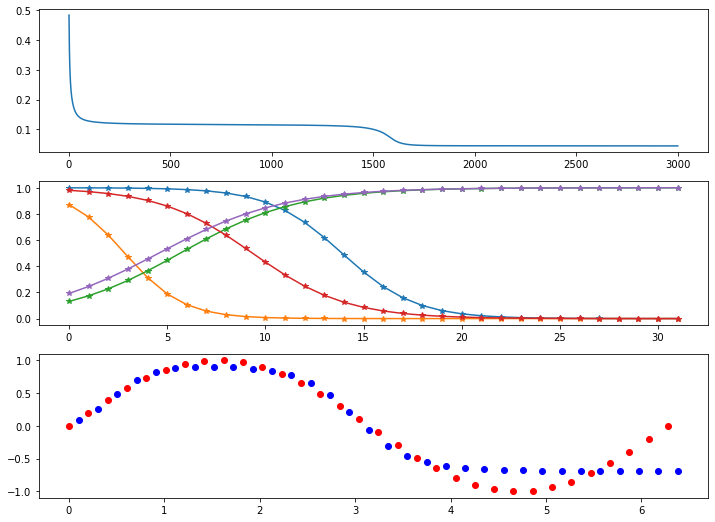

[ 2 5 1 ] Activation: sigmoid Iterations: 3000 Learning rate: 0.45 Final loss: 0.0443817495759397 Time: 0.7756202220916748


In [7]:
#   A Very Simple Neural Network in Python 3 with Numpy, Part 2
#   Alan Richmond @ Python3.codes
import numpy as np
import matplotlib.pyplot as plt
import math, time
 
epochs = 3000
batchSize = 4
activation = 'sigmoid'
#activation = 'tanh'
#activation = 'ReLU'
 
def f(x): return np.sin(x)
 
minx, maxx = 0, 6.28
miny, maxy = -1, 1
numx = int(maxx * 5 + 1)
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 5, 1
 
funcs = {'sigmoid':  (lambda x: 1/(1 + np.exp(-x)),
                      lambda x: x * (1 - x),  (0,  1), .45),
            'tanh':  (lambda x: np.tanh(x),
                      lambda x: 1 - x**2,     (0, -1), 0.005),
        }
(activate, activatePrime, (mina, maxa), L) = funcs[activation]
 
X = x = np.linspace(minx, maxx, num=numx)
X.shape = (numx, 1)
print(X.shape)
Y = y = f(X)
Y = (Y - miny)*(maxa - mina)/(maxy - miny) + mina   # normalise into activation
 
# add a bias unit to the input layer
X = np.concatenate((np.atleast_2d(np.ones(X.shape[0])).T, X), axis=1)
print(X.shape)
 
# Random initial weights
r0 = math.sqrt(2.0/(inputLayerSize))
r1 = math.sqrt(2.0/(hiddenLayerSize))
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize),low=-r0,high=r0)
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize),low=-r1,high=r1)
 
def next_batch(X, Y):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], Y[i:i + batchSize])
 
start = time.time()
lossHistory = []
 
for i in range(epochs):         # Training:
    epochLoss = []
 
    for (Xb, Yb) in next_batch(X, Y):
 
        H = activate(np.dot(Xb, Wh))            # hidden layer results
        Z = activate(np.dot(H,  Wz))            # output layer results
        E = Yb - Z                              # how much we missed (error)
        epochLoss.append(np.sum(E**2))
 
        dZ = E * activatePrime(Z)               # delta Z
        dH = dZ.dot(Wz.T) * activatePrime(H)    # delta H
        Wz += H.T.dot(dZ) * L                   # update output layer weights
        Wh += Xb.T.dot(dH) * L                  # update hidden layer weights
 
    mse = np.average(epochLoss)
    lossHistory.append(mse)
 
X[:, 1] += maxx/(numx-1)/2
H = activate(np.dot(X, Wh))
Z = activate(np.dot(H, Wz))
Z = ((miny - maxy) * Z - maxa * miny + maxy * mina)/(mina - maxa)
Y = y
 
end = time.time()
 
plt.figure(figsize=(12, 9))
plt.subplot(311)
plt.plot(lossHistory)
plt.subplot(312)
plt.plot(H, '-*')
plt.subplot(313)
plt.plot(x, Y, 'ro')    # training data
plt.plot(X[:, 1], Z, 'bo')   # learned
plt.show()
 
print('[', inputLayerSize, hiddenLayerSize, outputLayerSize, ']',
      'Activation:', activation, 'Iterations:', epochs,
      'Learning rate:', L, 'Final loss:', mse, 'Time:', end - start)

In [106]:
X = np.concatenate((np.atleast_2d(np.ones(X.shape[0])).T, X), axis=1)


In [8]:
X.shape

(32, 2)

In [11]:
Wh.shape

(2, 5)